/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.3366 - loss: 2.0018 - val_accuracy: 0.5899 - val_loss: 1.0314
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.6191 - loss: 0.9779 - val_accuracy: 0.6553 - val_loss: 0.9203
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.7318 - loss: 0.7372 - val_accuracy: 0.6499 - val_loss: 0.9015
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 964ms/step - accuracy: 0.8716 - loss: 0.4013 - val_accuracy: 0.6240 - val_loss: 1.1545
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9437 - loss: 0.2114 - val_accuracy: 0.6376 - val_loss: 1.4820
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9706 - loss: 0.1066 - val_accuracy: 0.6362 - val_loss: 1.3767
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 136s 975ms/step - accuracy: 0.9907 - loss: 0.0468 - val_accuracy: 0.6158 - val_loss: 1.7748
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9909 - loss: 0.0500 - val_accuracy: 0.6471 - 

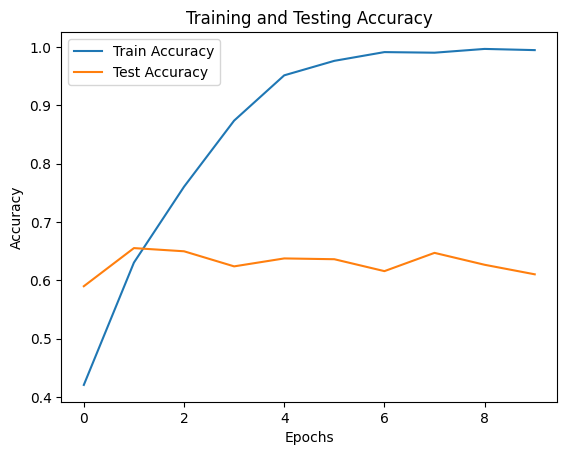

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.57 

In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)
num_classes = info.features['label'].num_classes


train_size = int(0.8 * info.splits['train'].num_examples)
test_size = info.splits['train'].num_examples - train_size

train_ds = dataset['train'].take(train_size)
test_ds = dataset['train'].skip(train_size)


def preprocess(image, label):
    image = tf.image.resize(image, [128, 128])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label


BATCH_SIZE = 32
train_ds = train_ds.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_ds, validation_data=test_ds, epochs=10)


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Training and Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))


print("\nClassification Report:")
print(classification_report(y_true, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
